In [1]:
%run ../utils/commonImports.py
%run ../utils/tradingImports.py
%matplotlib inline

# Load Data

In [3]:
featuresRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataFeatures'
fileName = 'return-01-within-day.tsv'
featuresFile = '{dataRoot}\\{fileName}'.format(dataRoot=featuresRoot, fileName=fileName)
featured = read_tsv(featuresFile)

In [4]:
featured.head()

,date,label,close,return,return_1,return_2,zscore_36_return,zscore_288_return,pma36,ma_12_108,ma_36_288,ac36,ac288,zscore_36_volume,zscore_288_volume,zscore_2016_volume,vol36,vol288,vol2016,dv_36_288
0,2017-01-09 23:50:00,True,904.0000,0.0055,-0.0016,-0.0000,2.6415,1.8693,0.9645,0.4935,0.4935,0.6778,-0.7486,0.1824,-0.0727,-0.3535,-0.8299,-1.8236,-0.0318,-1.8605
1,2017-01-09 23:55:00,True,900.4999,-0.0039,0.0055,-0.0016,-1.8954,-1.2764,0.4160,0.5310,0.5310,0.6949,-0.7415,0.1656,-0.0712,-0.3525,-0.7021,-1.7942,-0.0045,-1.8305
2,2017-01-10 00:00:00,True,901.2000,0.0008,-0.0039,0.0055,0.2481,0.2750,0.4957,0.5369,0.5369,0.7068,-0.7346,-0.5773,-0.3597,-0.4858,-0.7118,-1.7884,-0.0553,-1.8208
3,2017-01-10 00:05:00,True,902.4510,0.0014,0.0008,-0.0039,0.5257,0.4795,0.6585,0.5528,0.5528,0.7158,-0.7265,-0.3356,-0.2742,-0.4462,-0.7137,-1.7820,-0.0627,-1.8106
4,2017-01-10 00:10:00,True,903.7000,0.0014,0.0014,0.0008,0.5284,0.4744,0.8304,0.5965,0.5965,0.7079,-0.7171,1.0315,0.2534,-0.2029,-0.8363,-1.7826,-0.0798,-1.8065


In [30]:
X = featured.drop('date', axis=1).drop('label', axis=1).drop('close', axis=1)
y = featured['label'].apply(int)

# Test Train Validation Split

In [32]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.33)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.33)

Text(0.5,1,'Test Distribution')

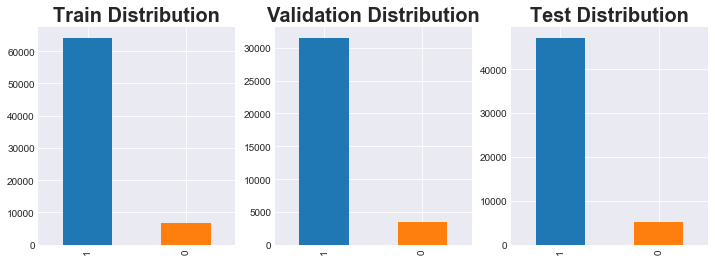

In [33]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font)

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix


def cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, columns=['predicted_0', 'predicted_1'], index=['true_0', 'true_1'])
    return cm


def eval(clf, X, y_true):
    y_pred = clf.predict(X)
    report = classification_report(y_true, y_pred)
    conf_matrix = cm(y_true, y_pred)
    print(conf_matrix)
    print()
    print(report)

In [39]:
eval(clf, X_val, y_val)

        predicted_0  predicted_1
true_0         1242         2209
true_1         2334        29230

             precision    recall  f1-score   support

          0       0.35      0.36      0.35      3451
          1       0.93      0.93      0.93     31564

avg / total       0.87      0.87      0.87     35015



In [40]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot')